# **Чтение данных + корреляция параметров**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('res4.csv',sep =';')  #Открытие файла с данными
data.head()

,OrderId,ClientID,LVM,"PayingType(0 - мес, 1 - год)","PackedgeLevel(0 - минимум, 1- стандарт, 2 - премиум)",NymberOfSub,DaysBeforPaing,NumOfCallToSup,NumOfAddServ,AcademicPerf,Status
0,402994,301596,29688,1,2,1,0.0,38,3,353,0
1,402457,316410,28930,0,2,1,0.0,14,0,216,0
2,402373,311368,28930,0,2,1,0.0,10,0,325,0
3,401786,313206,28931,0,2,1,0.0,9,0,163,0
4,401654,310600,31626,0,0,1,0.0,10,0,163,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 11 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   OrderId                                               642 non-null    int64  
 1   ClientID                                              642 non-null    int64  
 2   LVM                                                   642 non-null    int64  
 3   PayingType(0 - мес, 1 - год)                          642 non-null    int64  
 4   PackedgeLevel(0 - минимум, 1- стандарт, 2 - премиум)  642 non-null    int64  
 5   NymberOfSub                                           642 non-null    int64  
 6   DaysBeforPaing                                        642 non-null    float64
 7   NumOfCallToSup                                        642 non-null    int64  
 8   NumOfAddServ                                          642 no

In [ ]:
# Удаление признака с ID клиента
del data['OrderId']
del data['ClientID']

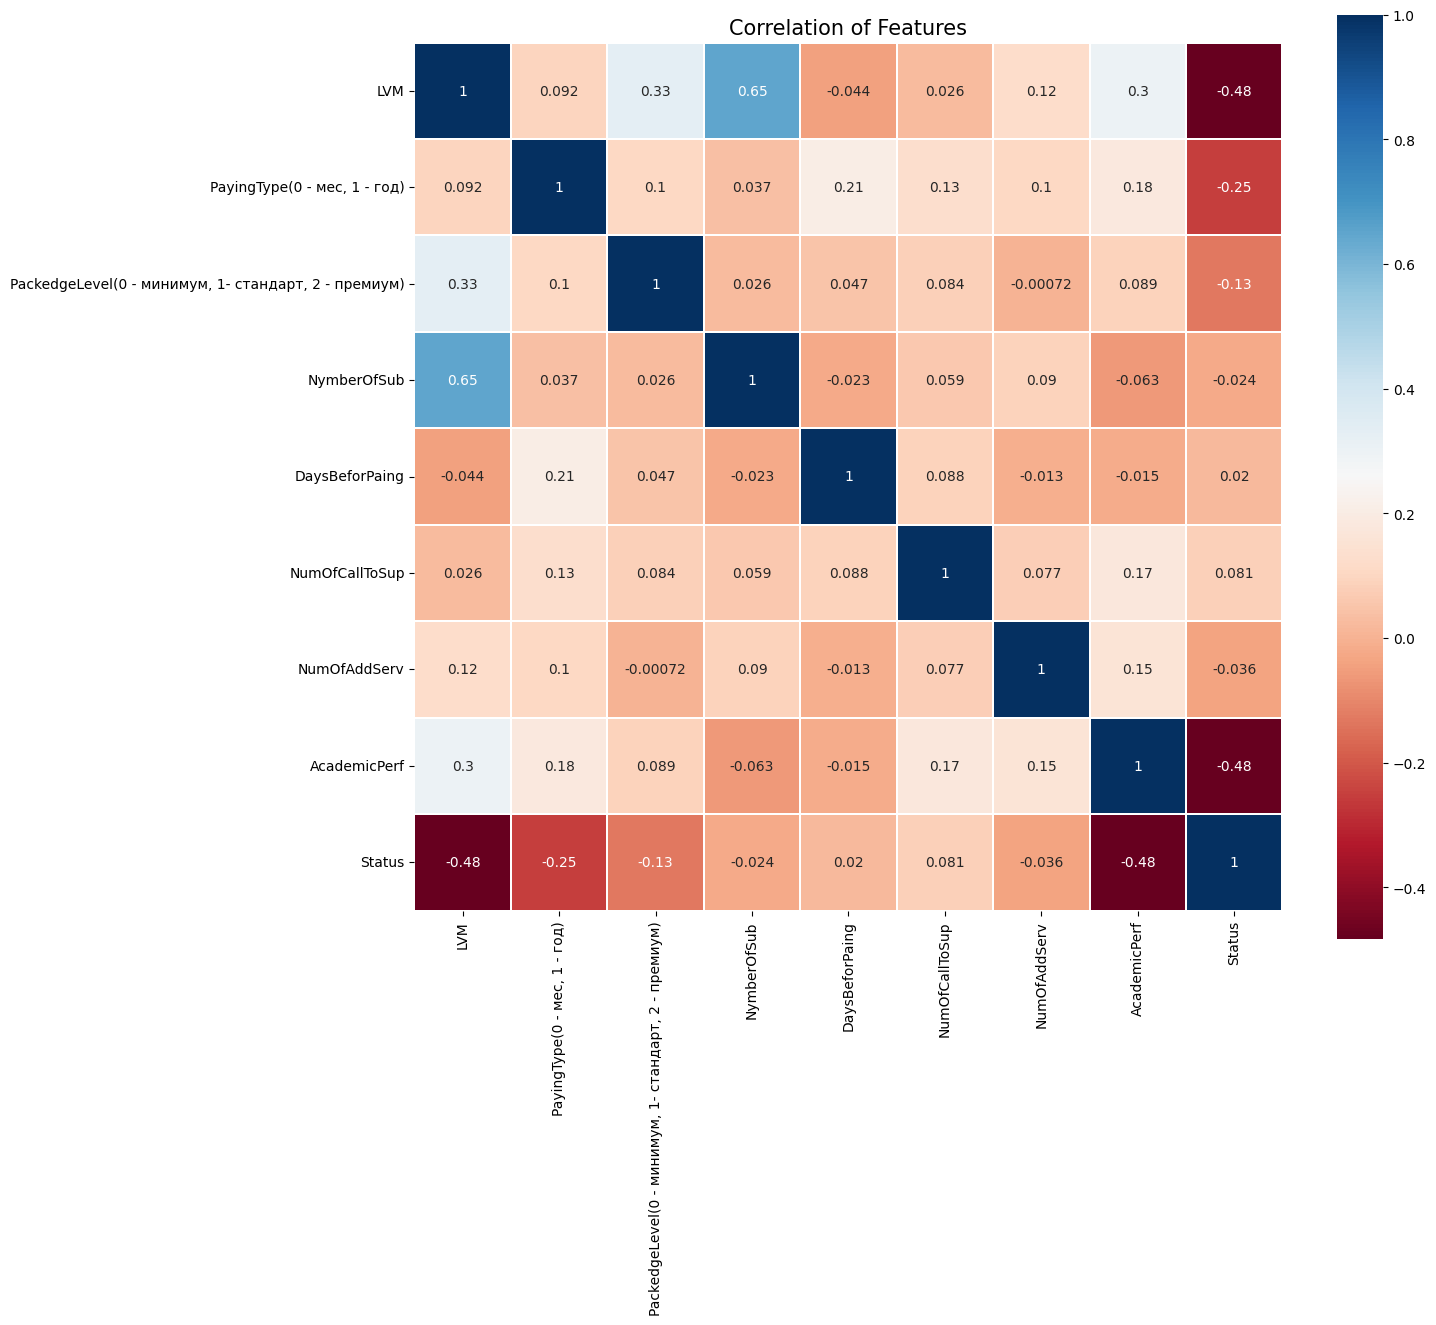

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2g')
plt.show()

# **NN**

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
17/17 [==============================] - 2s 4ms/step - loss: 0.6875 - accuracy: 0.5965
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6757 - accuracy: 0.5965
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6741 - accuracy: 0.5965
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5965
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5965
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.5965
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.5965
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6775 - accuracy: 0.5965
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5965
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.5965
Epoch 11/

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss на тестовой выборке:', loss)
print('Accuracy на тестовой выборке:', accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.5891
Loss на тестовой выборке: 0.6772242188453674
Accuracy на тестовой выборке: 0.5891472697257996


# **NB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

In [ ]:
nb_model = MultinomialNB()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)
X = data_scaled.iloc[:, :-1]
y = data_scaled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [ ]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
accuracy = nb_model.score(X_test, y_test)
print('Accuracy на тестовой выборке для модели NB:', accuracy)

Accuracy на тестовой выборке для модели NB: 0.5891472868217055


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
accuracy = rf_classifier.score(X_test, y_test)
print('Accuracy на тестовой выборке для модели RF:', accuracy)

Accuracy на тестовой выборке для модели RF: 0.8604651162790697


# **SVM**

In [ ]:
from sklearn.svm import SVC


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    #Масштабирование данных
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_classifier = SVC()

# Обучите модель на обучающих данных
svm_classifier.fit(X_train_scaled, y_train)

SVC()

In [ ]:
accuracy = svm_classifier.score(X_test_scaled, y_test)

# predictions = svm_classifier.predict(X_test_scaled)

# # Оцените качество модели
# accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8682170542635659


# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
# Параметры модели
params = {
    'max_depth': 7,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'n_estimators': 100
}

In [ ]:
xgboost_classifier = XGBClassifier(**params)
xgboost_classifier.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
accuracy = xgboost_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5891472868217055


# **CatBoost**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.2 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostRegressor
params = {
    'iterations': 100,
    'learning_rate': 0.2,
    'depth': 8
}

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
catboost_classifier = CatBoostRegressor(**params)
catboost_classifier.fit(X_train, y_train)

0:	learn: 0.4351343	total: 47.8ms	remaining: 4.73s
1:	learn: 0.3938057	total: 50.9ms	remaining: 2.5s
2:	learn: 0.3616465	total: 53.1ms	remaining: 1.72s
3:	learn: 0.3392956	total: 53.8ms	remaining: 1.29s
4:	learn: 0.3202597	total: 55.7ms	remaining: 1.06s
5:	learn: 0.3058897	total: 57.7ms	remaining: 904ms
6:	learn: 0.2937730	total: 59.7ms	remaining: 794ms
7:	learn: 0.2846226	total: 61.7ms	remaining: 710ms
8:	learn: 0.2773056	total: 63.8ms	remaining: 645ms
9:	learn: 0.2708801	total: 65.8ms	remaining: 592ms
10:	learn: 0.2640062	total: 68.9ms	remaining: 557ms
11:	learn: 0.2573953	total: 71.9ms	remaining: 527ms
12:	learn: 0.2537032	total: 73.3ms	remaining: 490ms
13:	learn: 0.2480129	total: 75.2ms	remaining: 462ms
14:	learn: 0.2459355	total: 76.3ms	remaining: 432ms
15:	learn: 0.2435095	total: 78.3ms	remaining: 411ms
16:	learn: 0.2397951	total: 80.4ms	remaining: 392ms
17:	learn: 0.2395388	total: 81ms	remaining: 369ms
18:	learn: 0.2352696	total: 82.9ms	remaining: 353ms
19:	learn: 0.2320060	tota

In [ ]:
accuracy = catboost_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6673831581937774


# **KMeans**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=30)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=30)

In [ ]:
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

In [ ]:
predicted_labels = [0 if cluster_label == train_cluster_labels[0] else 1 for cluster_label in test_cluster_labels]

In [ ]:
accuracy = sum(predicted_labels == y_test) / len(y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5426356589147286


# **Подбор гиперпараметров SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    #Масштабирование данных
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_classifier = SVC()

# Обучите модель на обучающих данных
svm_classifier.fit(X_train_scaled, y_train)
predictions = svm_classifier.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        77
           1       0.90      0.69      0.78        52

    accuracy                           0.84       129
   macro avg       0.86      0.82      0.83       129
weighted avg       0.85      0.84      0.84       129



In [ ]:
accuracy = svm_classifier.score(X_test_scaled, y_test)
# joblib.dump(rf_classifier, "random_forest_model.joblib")
print('Accuracy на тестовой выборке для модели SVM:', accuracy)

Accuracy на тестовой выборке для модели SVM: 0.8449612403100775


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
C = [x for x in np.linspace(start = 0.001, stop = 2, num = 5)] + [x for x in np.linspace(start = 2.3, stop = 1000, num = 5)]
gamma = ['scale', 'auto'] + [x for x in np.linspace(start = 0.001, stop = 10, num = 5)]
degree = [int(x) for x in np.linspace(start = 2, stop = 7, num = 6)]

param_dist = {'C': C,
              'gamma': gamma,
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': degree}

rs = RandomizedSearchCV(svm_classifier,
                        param_dist,
                        n_iter = 100,
                        cv = 3,
                        verbose = 1,
                        n_jobs=-1,
                        random_state=0)
rs.fit(X_train_scaled, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'kernel': 'linear', 'gamma': 2.50075, 'degree': 2, 'C': 1.5002499999999999}

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time',
            'std_fit_time',
            'mean_score_time',
            'std_score_time',
            'params',
            'split0_test_score',
            'split1_test_score',
            'split2_test_score',
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_kernel,param_gamma,param_degree,param_C,mean_test_score,rank_test_score
0,linear,0.001,7,750.575,0.875244,1
1,linear,scale,7,2.3,0.875244,1
2,linear,scale,5,1000.0,0.875244,1
3,linear,5.0005,7,2.0,0.875244,1
4,linear,7.50025,2,501.15,0.875244,1
5,linear,scale,2,2.0,0.875244,1
6,linear,auto,5,2.0,0.875244,1
7,linear,scale,4,2.3,0.875244,1
8,linear,5.0005,6,1.50025,0.875244,1
9,linear,2.50075,5,1000.0,0.875244,1


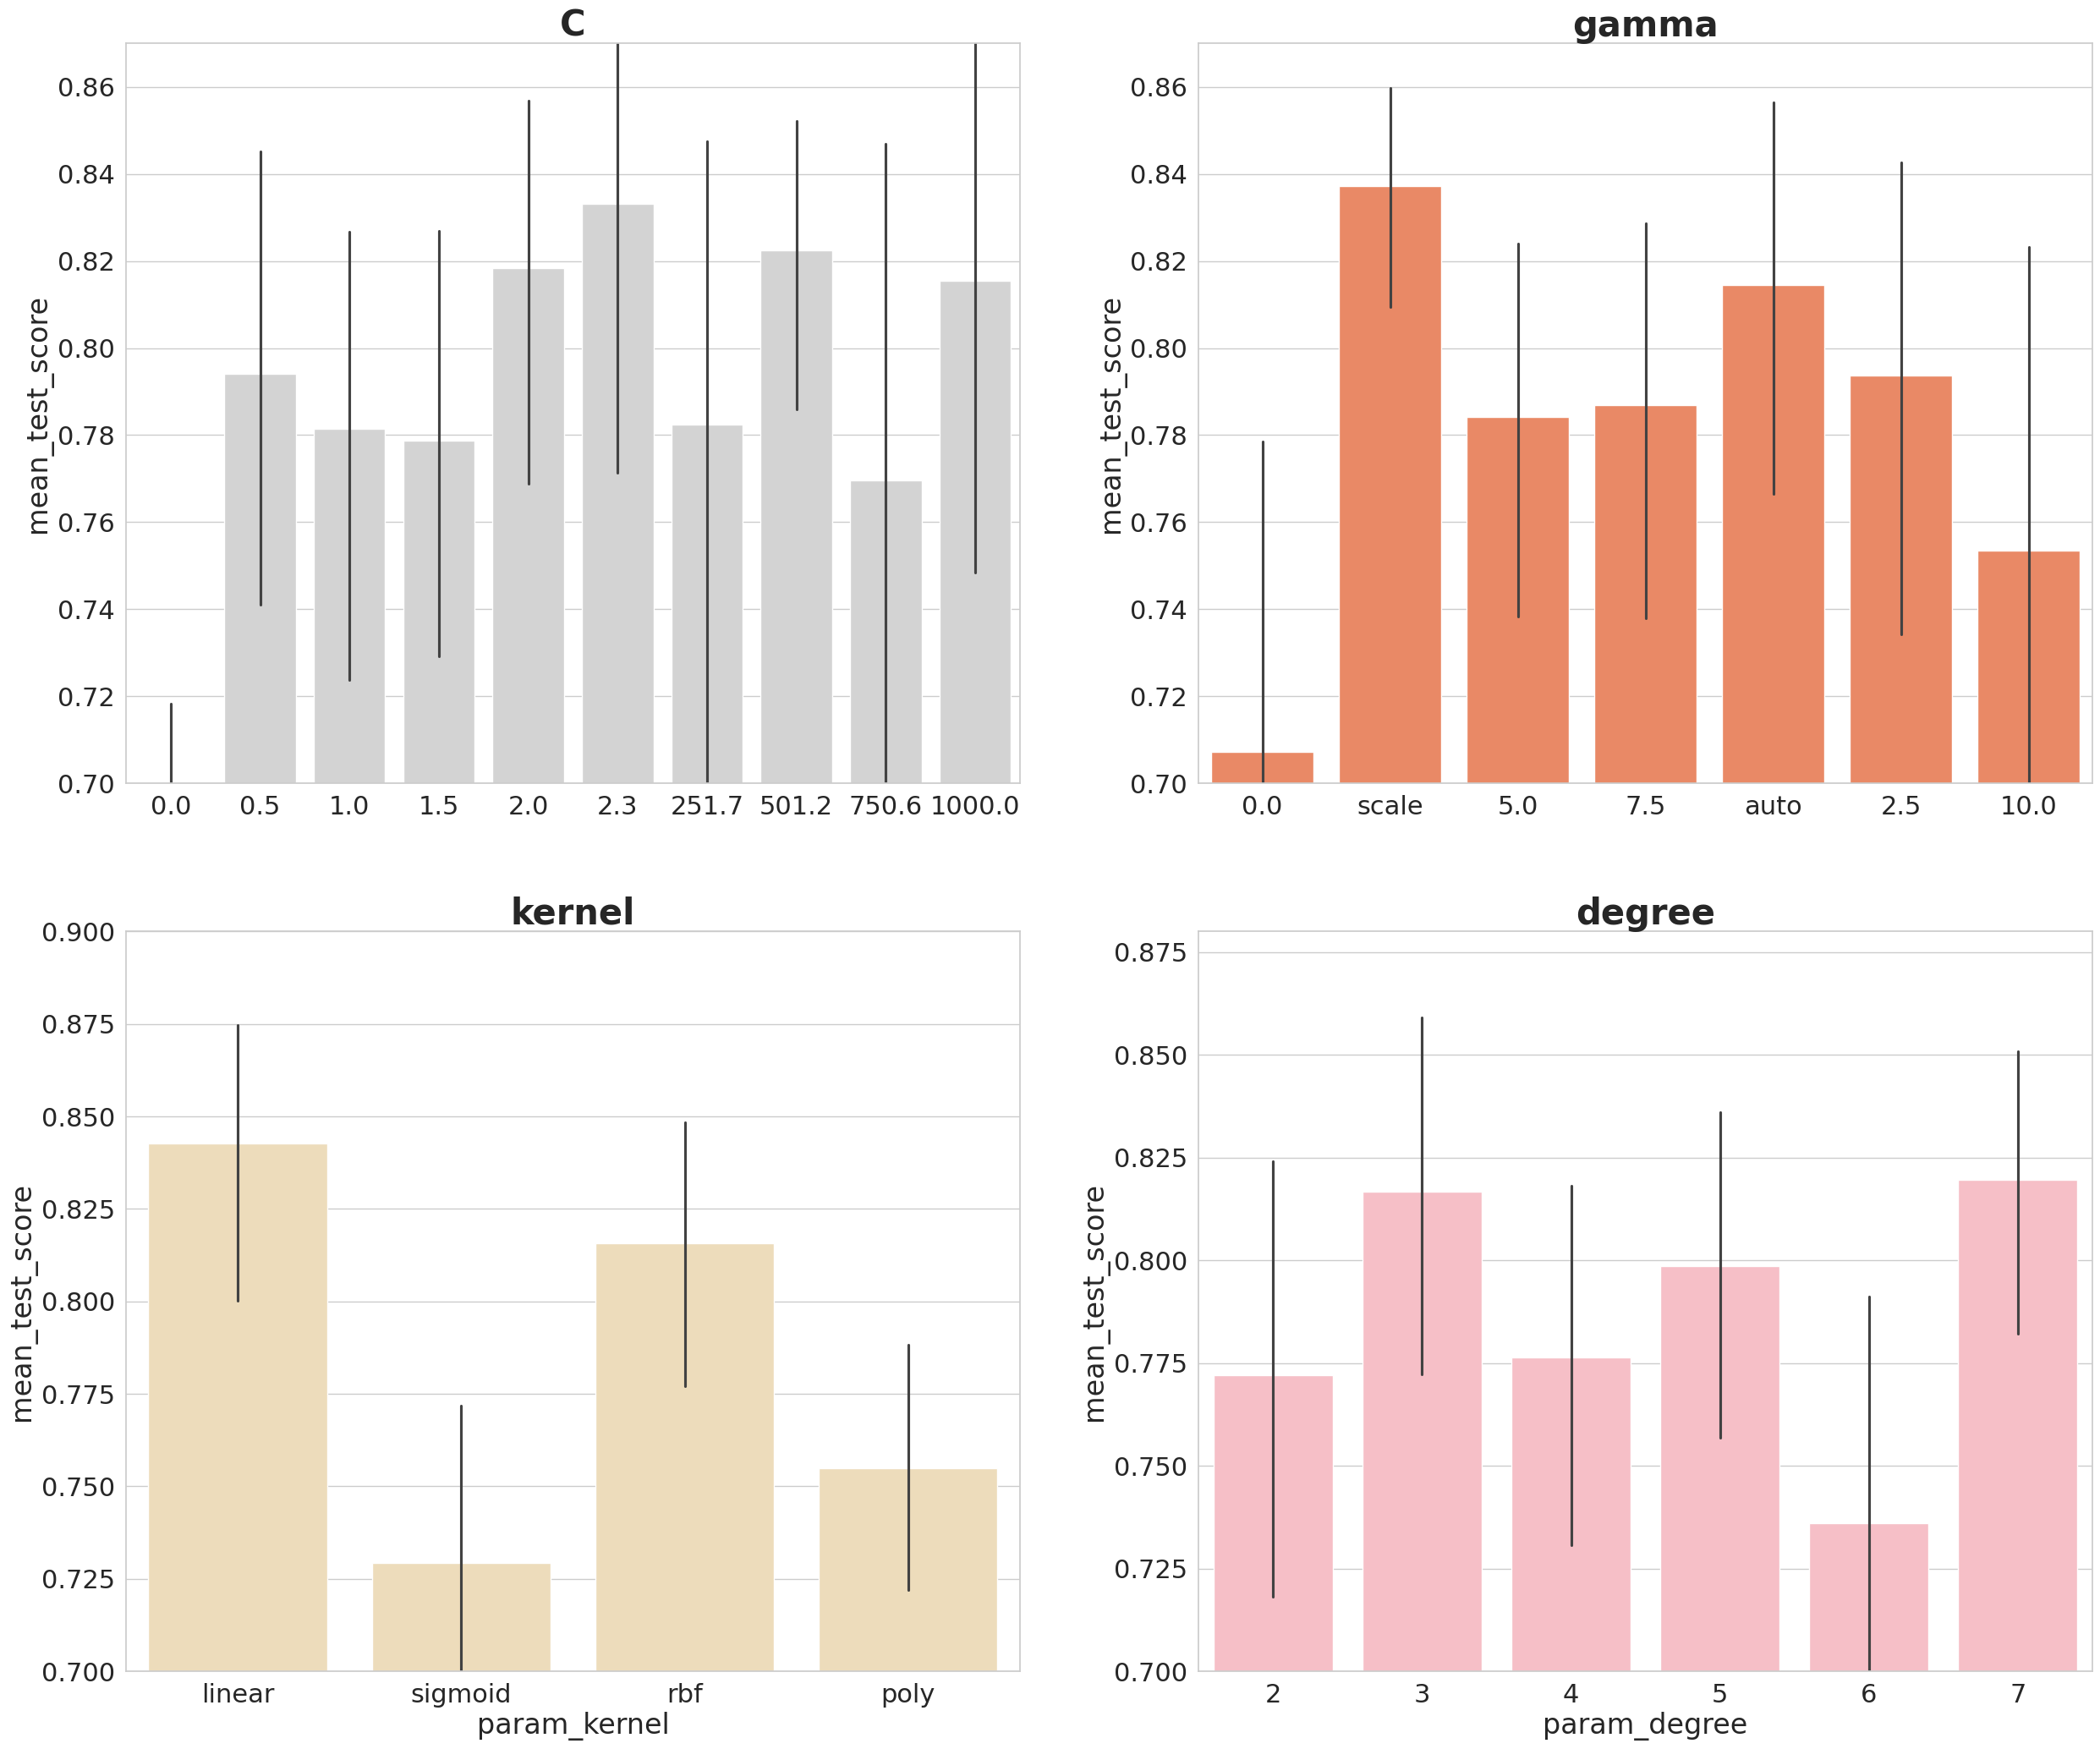

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)

sns.barplot(x=[round(z,1) for z in rs_df['param_C']], y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.70,.87])
axs[0,0].set_title(label = 'C', size=30, weight='bold')

sns.barplot(x= ['{:.1f}'.format((z))
if type(z) == np.float64  else z
                for z in rs_df['param_gamma']] , y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.70,.87])
axs[0,1].set_title(label = 'gamma', size=30, weight='bold')


sns.barplot(x='param_kernel', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.70,.90])
axs[1,0].set_title(label = 'kernel', size=30, weight='bold')

sns.barplot(x='param_degree', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.70,.88])
axs[1,1].set_title(label = 'degree', size=30, weight='bold')


plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {'C': [2.3,2.5,10,500],
              'gamma': ['scale', 'auto',2.5],
              'kernel': ['linear', 'rbf' ],
              'degree': [7,3]}
grid_svm = GridSearchCV(svm_classifier, param_grid_svm, verbose = 1, cv = 3, n_jobs = 1)
grid_svm.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [2.3, 2.5, 10, 500], 'degree': [7, 3],
                         'gamma': ['scale', 'auto', 2.5],
                         'kernel': ['linear', 'rbf']},
             verbose=1)

In [ ]:
# print best parameter after tuning
print(grid_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svm.best_estimator_)

grid_svm_predictions = grid_svm.predict(X_test_scaled)

# print classification report
print(classification_report(y_test, grid_svm_predictions))

{'C': 10, 'degree': 7, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=10, degree=7)
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        76
           1       0.91      0.74      0.81        53

    accuracy                           0.86       129
   macro avg       0.87      0.84      0.85       129
weighted avg       0.87      0.86      0.86       129



In [ ]:
accuracy = grid_svm.score(X_test_scaled, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.8604651162790697


In [ ]:
import joblib
# save
joblib.dump(grid_svm, "svm_model.joblib")

['svm_model.joblib']

In [ ]:
# load model
loaded_svm = joblib.load("svm_model.joblib")
accuracy = loaded_svm.score(X_test_scaled, y_test)

print("Accuracy:", accuracy)

Accuracy: 0.8604651162790697


# **Подбор гиперпараметорв Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
predictions = rf_classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89        76
           1       0.87      0.77      0.82        53

    accuracy                           0.86       129
   macro avg       0.86      0.85      0.85       129
weighted avg       0.86      0.86      0.86       129



In [ ]:
accuracy = rf_classifier.score(X_test, y_test)

print('Accuracy на тестовой выборке для модели RF:', accuracy)

Accuracy на тестовой выборке для модели RF: 0.8604651162790697


In [ ]:
# load model
loaded_rf = joblib.load("random_forest_model.joblib")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rf_classifier,
                        param_dist,
                        n_iter = 100,
                        cv = 3,
                        verbose = 1,
                        n_jobs=-1,
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


{'n_estimators': 564,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time',
            'std_fit_time',
            'mean_score_time',
            'std_score_time',
            'params',
            'split0_test_score',
            'split1_test_score',
            'split2_test_score',
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,564,23,2,sqrt,15,False,0.881092,1
1,455,18,7,log2,7,True,0.879142,2
2,346,23,2,sqrt,14,False,0.879142,2
3,673,23,7,log2,15,False,0.877193,4
4,128,12,2,log2,4,True,0.877193,4
5,673,12,2,sqrt,13,False,0.877193,6
6,673,2,2,log2,11,True,0.875244,7
7,20,2,18,sqrt,15,False,0.873294,8
8,673,18,7,sqrt,7,False,0.873294,8
9,346,2,23,log2,1,False,0.869396,10


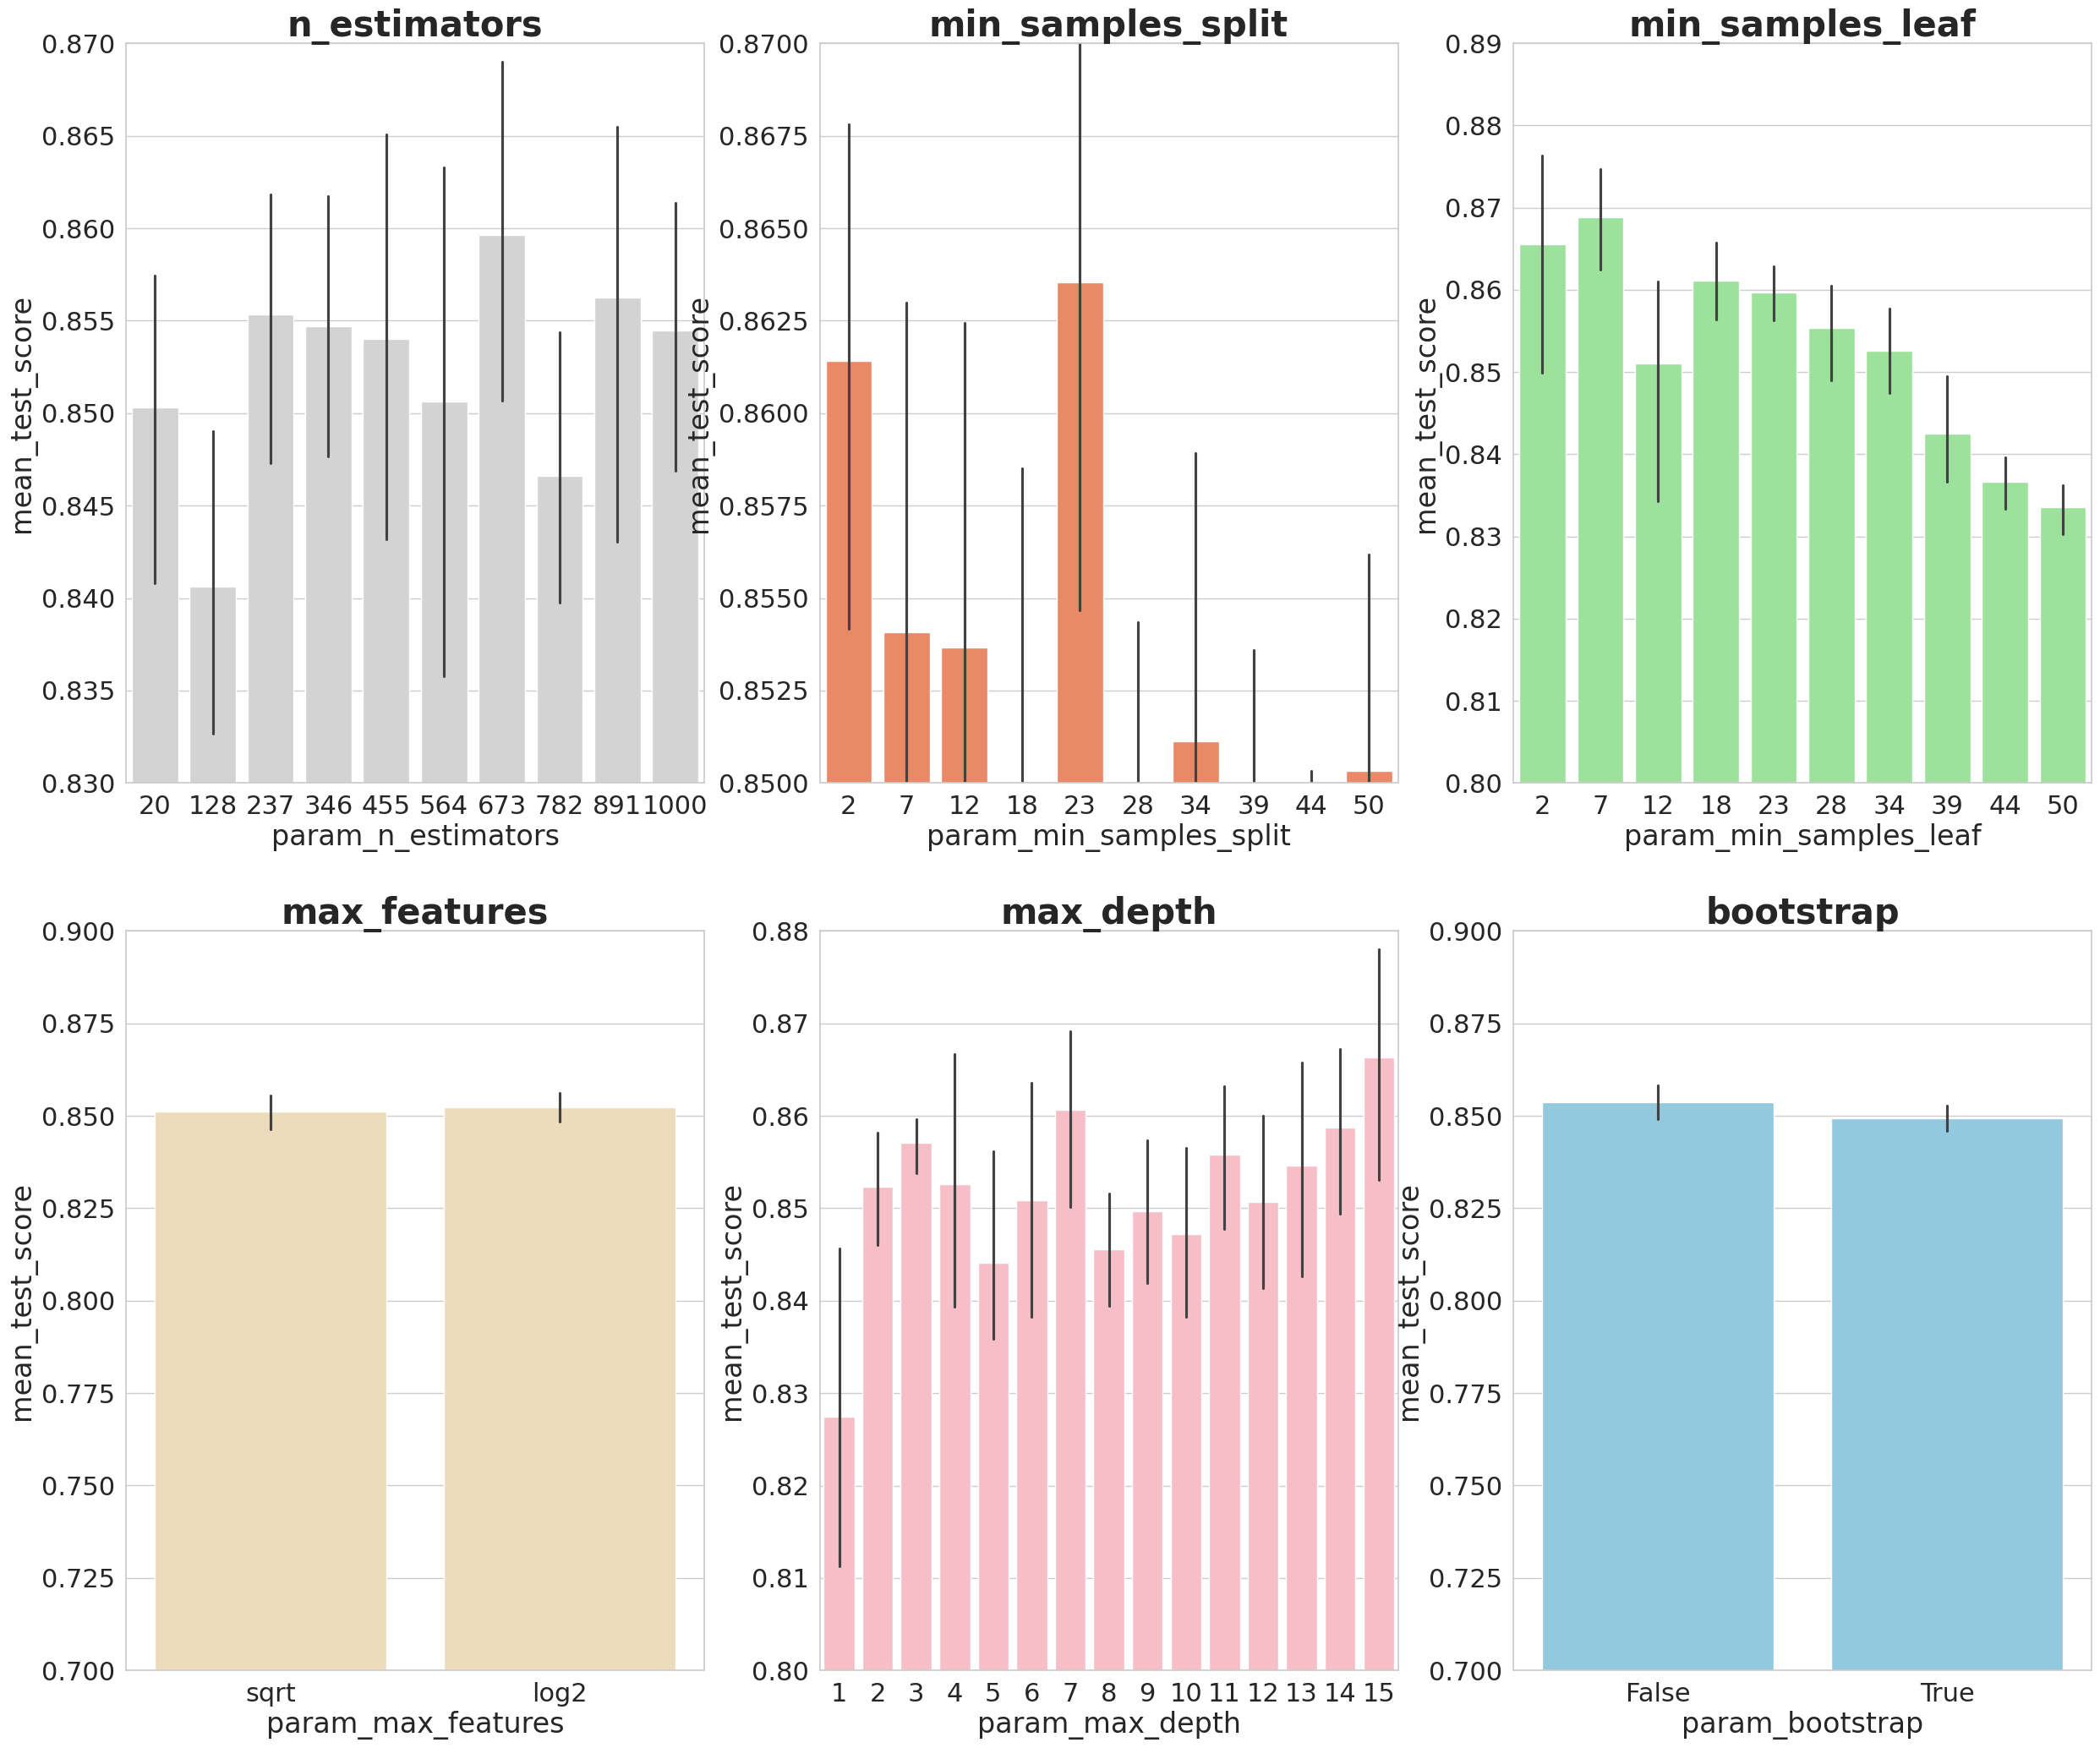

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.87])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.87])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.89])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=rs_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.70,.90])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=rs_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.88])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=rs_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.70,.90])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_rf ={
    'n_estimators': [237, 673, 891],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [7, 10, 15, 18],
    'min_samples_split': [2, 21, 23],
    'min_samples_leaf': [2,5,7,18],
    'bootstrap': [True, False]
}
grid_rf = GridSearchCV(rf_classifier, param_grid_rf, verbose = 1, cv = 3, n_jobs = 1)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [7, 10, 15, 18],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 7, 18],
                         'min_samples_split': [2, 21, 23],
                         'n_estimators': [237, 673, 891]},
             verbose=1)

In [ ]:
# print best parameter after tuning
print(grid_rf.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_rf.best_estimator_)

grid_rf_predictions = grid_rf.predict(X_test)

# print classification report
print(classification_report(y_test, grid_rf_predictions))

{'bootstrap': False, 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 891}
RandomForestClassifier(bootstrap=False, max_depth=7, max_features='log2',
                       min_samples_leaf=2, n_estimators=891)
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        76
           1       0.93      0.77      0.85        53

    accuracy                           0.88       129
   macro avg       0.90      0.87      0.88       129
weighted avg       0.89      0.88      0.88       129



In [ ]:
accuracy = grid_rf.score(X_test, y_test)
print('Accuracy на тестовой выборке для модели RF:', accuracy)

Accuracy на тестовой выборке для модели RF: 0.8837209302325582


In [ ]:
import joblib
# save
joblib.dump(grid_rf, "random_forest_model.joblib")

['random_forest_model.joblib']

# **Получение метрик**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()    #Масштабирование данных
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Получение прогнозов модели на ваших данных
loaded_svm = joblib.load("svm_model.joblib")
loaded_rf = joblib.load("random_forest_model.joblib")

predictions_svm = loaded_svm.predict(X_test_scaled)  # X_test - ваши данные для тестирования
predictions_rf = loaded_rf.predict(X_test)
# Вычисление точности
accuracy_svm = accuracy_score(y_test, predictions_svm)  # y_test - истинные метки классов
accuracy_rf = accuracy_score(y_test, predictions_rf)
# Вычисление F1-меры
f1_svm = f1_score(y_test, predictions_svm)
f1_rf = f1_score(y_test, predictions_rf)
# Если ваша задача классификации бинарная, то можно вычислить AUC
# Если у вас не бинарная классификация, AUC не применим

auc_svm = roc_auc_score(y_test, predictions_svm)
auc_rf = roc_auc_score(y_test, predictions_rf)

# Создание таблицы с метриками
metrics_table = pd.DataFrame({'Метрика': ['Точность', 'F1-мера', 'AUC'],
                              'SVM': [accuracy_svm, f1_svm, auc_svm],
                              'Random Forest': [accuracy_rf, f1_rf, auc_rf],
                              })
print(metrics_table)

    Метрика       SVM  Random Forest
0  Точность  0.860465       0.883721
1   F1-мера  0.812500       0.845361
2       AUC  0.841609       0.867056


In [ ]:
from tabulate import tabulate
print(tabulate(metrics_table, headers='keys' ,showindex=False))

Метрика         SVM    Random Forest
---------  --------  ---------------
Точность   0.860465         0.883721
F1-мера    0.8125           0.845361
AUC        0.841609         0.867056
